# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---
* [1.데이터형 변환 ](#데이터형-변환) <br>
     *  [1.1 pandas 수치형 변환](#to_numeric)
         *  [to_numeric](#to_numeric)
         *  [  astype ](#astype)
     * [1.2 Label Encoding](#Label-Encoding)<br>
         * [category](#category)<br>
         * [map](#map)<br>
         * [LabelEncoder](#LabelEncoder)<br>
         * [OrdinalEncoder](#OrdinalEncoder)<br>       
     * [1.3 One-Hot Encoding](#One-Hot-Encoding)<br>
         * [get_dummies](#get_dummies)<br>
         * [OneHotEncoder](#OneHotEncoder)<br>
         
*  [2. Dimensionality Reduction](#Dimensionality-Reduction)
      * [PCA(Principle Component Analysis)](#PCA(Principle-Component-Analysis))<br>
* [3.분류 예측의 불확실성 추정](#분류-예측의-불확실성-추정)<br>
     * [predict_proba](#predict_proba)<br>
     * [predict_log_proba](#predict_log_proba)<br>
     * [decision_function](#decision_function)<br>
* [4. Ensemble](#Ensemble)<br>
     * [Boosting](#Boosting)<br>
     * [Bagging](#BaggingClassifier)<br>
     * [Random Forest](#RandomForestClassifier)<br>
     * [Voting](#VotingClassifier)<br>     
         * [응용: GridSearchCV&Pipeline](#GridSearchCV&Pipeline)<br>     
     * [Stacking](#StackingClassifier)<br>     
         * [응용: RandomizedSearchCV](#RandomizedSearchCV)<br>     


In [4]:
import pandas as pd

### fetch_kddcup99
- 480만개의 데이터
    - fetch_kddcup99 인터넷으로부터 데이터를 다운로드 받으므로 속도가 느림
        - kddcup: KDD에서 데이터 마이닝, 지식 발견 관련 competition 
    - 데이터 용량이 built-in 데이터세트보다 훨씬 크다.

In [1]:
from sklearn.datasets import fetch_kddcup99

In [3]:
data=fetch_kddcup99()

In [6]:
print(data.DESCR)

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [1]. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, ie

1) qualitatively different from normal data

2) in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

-SA is obtained by simply selecting all t

In [7]:
dir(data)  # ['DESCR', 'data', 'target'] 만 존재

['DESCR', 'data', 'target']

In [4]:
network=pd.DataFrame(data.data)

In [5]:
network['target']=data.target

40개의 features와 target 은 object 데이터 타입
- 결측치 없음
- 데이터형 변환 필요

In [16]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       494021 non-null  object
 1   1       494021 non-null  object
 2   2       494021 non-null  object
 3   3       494021 non-null  object
 4   4       494021 non-null  object
 5   5       494021 non-null  object
 6   6       494021 non-null  object
 7   7       494021 non-null  object
 8   8       494021 non-null  object
 9   9       494021 non-null  object
 10  10      494021 non-null  object
 11  11      494021 non-null  object
 12  12      494021 non-null  object
 13  13      494021 non-null  object
 14  14      494021 non-null  object
 15  15      494021 non-null  object
 16  16      494021 non-null  object
 17  17      494021 non-null  object
 18  18      494021 non-null  object
 19  19      494021 non-null  object
 20  20      494021 non-null  object
 21  21      494021 non-null  object
 

## 데이터형 변환
- 수치형 변환 
    - to_numeric
    - astype
- Label Encoding
    - category
    - map
    - LabelEncoder
    - OrdinalEncoder
- One-Hot Encoding
    - get_dummies
    - OneHotEncoder
    
### pandas 수치형 변환
- to_numeric, astype


### to_numeric
- to_numeric 에 옵션으로 여러가지 error 고치는 기능
- 문자를 숫자로 바꿈.

In [12]:
network[0].value_counts()

0       481671
1         2476
2          870
3          625
5          554
         ...  
5699         1
5714         1
5720         1
5733         1
3770         1
Name: 0, Length: 2495, dtype: int64

In [15]:
pd.to_numeric(network[0]).value_counts().index #숫자로 바꾸어줌

Int64Index([    0,     1,     2,     3,     5,  2630,     4,    14,    10,
                7,
            ...
              412,  2461, 17300, 15515,  3229, 10136,   669, 11160, 20116,
             5502],
           dtype='int64', length=2495)

In [17]:
network[1].value_counts() #3개

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: 1, dtype: int64

### astype
기본적으로 numpy는 문자로 형변환 해줌. 
- 하나라도 문자가 있으면 ERROR 생김

In [2]:
import numpy as np
np.array([1,'1'])  

array(['1', '1'], dtype='<U21')

In [28]:
a='1'
dir(a)
a.isalnum()     #문자열 안에 숫자이면 True
a.isdecimal() #숫자표현가능 하면 True

True

In [24]:
network[0].astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: 0, Length: 494021, dtype: int64

In [25]:
network[0].astype('int').value_counts()

0        481671
1          2476
2           870
3           625
5           554
          ...  
10136         1
669           1
11160         1
20116         1
5502          1
Name: 0, Length: 2495, dtype: int64

### Label Encoding
- category
- map
- LabelEncoder
- OrdinalEncoder

In [11]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder

#### category
- `astype('category').cat.codes`
- 자동 변환

In [10]:
network[1].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: 1, dtype: int64

In [7]:
# 1. category
network[1].astype('category').cat.codes

0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Length: 494021, dtype: int8

In [8]:
network[1].unique()

array([b'tcp', b'udp', b'icmp'], dtype=object)

#### map

In [53]:
# 2. map
network[1].map({b'tcp':0, b'udp':1, b'icmp':2})

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: 1, Length: 494021, dtype: int64

#### LabelEncoder

In [54]:
#3.LabelEncoder
LE=LabelEncoder()

In [56]:
LE.fit_transform(network[1]) #이것만 1차원

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
LE.fit_transform(network[1])[...,np.newaxis] #차원 추가 2차원

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

#### OrdinalEncoder
- LabelEncoder 는 순서가 크기로 나오지만
- integer array 처럼 카테고리의 특징을 인코딩함
    - 서수: 인코딩한 값간의 순서가 있음.

In [60]:
#4.OrdinalEncoder
OE= OrdinalEncoder()# 인스턴스화 
OE.fit_transform( network[[1]])                 #float

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### One-Hot Encoding
- get_dummies
- OneHotEncoder

#### get_dummies

In [62]:
pd.get_dummies(network[0])

,0,1,2,3,4,5,6,7,8,9,...,40339,40448,40571,40682,40806,40929,41065,42088,42448,58329
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494017,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494018,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### OneHotEncoder

In [63]:
ohe=OneHotEncoder()

In [64]:
ohe.fit_transform(network[[0]])  #sparse matrix 

<494021x2495 sparse matrix of type '<class 'numpy.float64'>'
	with 494021 stored elements in Compressed Sparse Row format>

OneHotEncoder 를 matrix 형태로 바꾸기 위해 `toarray`

In [65]:
ohe.fit_transform(network[[0]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

--- 
알고리즘별로 구분하는법
1. linear vs nonlinear
    - decision boundary가 선형인지 아니면 더 복잡한 모형인지
2. parametric vs nonparametric
    - parametric : 선형회귀 :$ y=\alpha x+\beta$ : 오류를 최소화 하는 $\alpha,\beta$
    - nonparametric : decision tree : 데이터에 따라서 모델이 항상 바뀜.
3. descimitnitive vs generative


### NonParametric Model
### DecisionTreeClassifier

In [136]:
from sklearn.tree import DecisionTreeClassifier   #parametric
from sklearn.linear_model import LogisticRegression#Non-parametric

In [137]:
import seaborn as sns

In [138]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.species=iris.species.map({'setosa':0,'versicolor':1,'virginica':2})



### Feature Selection 
 데이터가 feature에 비해 부족(차원의 저주) 
  - overfiting  
  > 오캄의 면도날: 같은 성능이면 더 간단한 모델 선택
  
방법
1. filter
2. wrapper
4. embeded

#### embeded 방식

#### feature_importances_
- 값들 중에서 가장 영향을 크게 미치는 feature를 확률 값으로 보여줌
- 상대비율이므로 가장 큰값이 가장 영향력 있음.
- 중요순대로 feature selection함. 그외값은 제외 가능
해당예시에서는  0.55072262, 0.42261071 확률을 갖는 feature를 선택

In [51]:
dt.feature_importances_

array([0.01333333, 0.01333333, 0.55072262, 0.42261071])

## Dimensionality Reduction
- 특성을 유지한채로 차원을 줄여버리고 새로운 특징으로 나타냄

### PCA(Principle Component Analysis)
- 주성분 분석(PCA)
   -  기존 변수들을 선형 결합을 하여 새로운 변수를 만들어 차원을 축소함
       - 변수의 갯수만큼 주성분 존재
       - 축소하게 되면 원래의 데이터의 의미를 잃음 (차원이 축소됨)
           - fatures selectoin은 데이터 자체가 변하지 않으나  성능이 좋음

  1.component 1: 분산이 가장 큰 축(component)
     - 해당 데이터의 가장 많은 정보를 담고 있음
     - 특성들간의 상관관계도 가장 큼
 
 2. component 2: **첫번째 주성분 축과 직교(orthogonal)**하면서 정사영했을 때 **분산이 가장 큰 축**
     - 해당 축을 바탕으로 정사형(projection)하였고 서로 독립
     - 입체적인 물체를 빛에 비췄을때 그림자로 나오는 것으로 이해하면 쉬움
 3. 위의 과정을 반복하여 원한는 갯수의 주성분을 남기고 모두 차원을 축소화함

  4. transforemd data : 각 주성분을 축으로 하여 변환
  5.  변환된 데이터를 다시 원본 특성을 축(원래의 특성공간)으로 돌려놓음


mglearn : 공부하는 연습용 데이터 제공

In [119]:
#!pip install mglearn

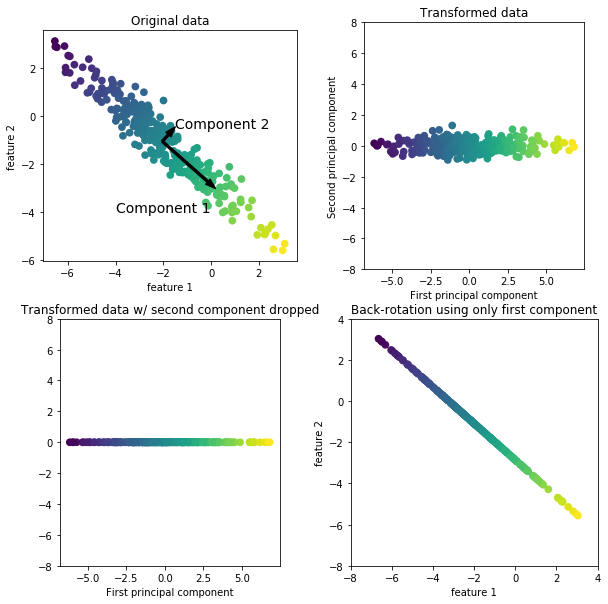

In [127]:
import mglearn
mglearn.plot_pca.plot_pca_illustration()

decomposition  - 분해라는 의미

In [7]:
from sklearn.decomposition import PCA

In [20]:
pca=PCA(2) # 2 components

원래데이터의 고유값을 잃어버림,
- 원본 데이터의 의미를 잃어버리기 떄문에 더이상 전처리 하지 않는 데이터에 PCA 를 마지막으로 사용
- 이 데이터로 학습 또는 이용해서 특성 뽑으면 원본 데이터와 거의 차이가 없음

- 비지도 학습이므로 attributes만 넣음
- iris에서는 4차원에서 3차원으로 축소함

In [21]:
x=pca.fit_transform(iris.iloc[:,:-1])# 2 components

산점도를 보면 각 주성분의 분포가 넓음을 알 수 있음

<AxesSubplot:xlabel='component1', ylabel='component2'>

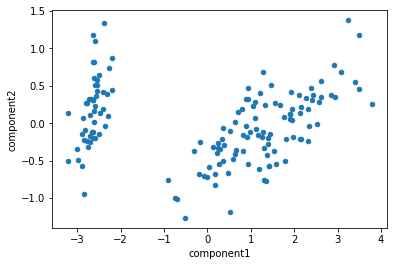

In [22]:
import matplotlib.pyplot as plt
a = pd.DataFrame(x, columns=["component1", "component2"])
a.plot.scatter("component1", "component2")

## 분류 예측의 불확실성 추정
- 이진,다중 분류에 사용
    - predict_proba
        - 확률기반 모델에서 예측 가능 높은것
    - decision_function

#### predict_proba
- 확률 추정치(추정값)
- 클래스의 라벨의 순서대로 갹 클래스에 속할 확률로 반환
- 다중분류인경우에는 softmax함수를 사용하여 각 클래스별로 예측 확률을 찾아줌 

In [31]:
lr=LogisticRegression()
lr.fit(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
lr.predict([[3,3,3,3]])  #class

array(['setosa'], dtype=object)

In [19]:
lr.predict_proba([[3,3,3,3]]) #각 클래스별로 확률로 보여줌 총합 =1

array([[0.56906732, 0.16402821, 0.26690447]])

#### predict_log_proba
- 확률 추정치(추정값)의 로그값 예측
- 클래스의 라벨의 순서대로 갹 클래스에 속할 확률로 반환

In [27]:
lr.predict_log_proba([[3,3,3,3]]) 

array([[-0.56375654, -1.80771688, -1.32086446]])

모델별로 확률 추정치 예측이 다름을 알수 있음
- 로지스틱 회귀에서는 setosa일 확률이 0.56906732로 제일 높음
- Decsion tree 분류기에서는 virginica일 확률이 1.0

In [44]:
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(iris.iloc[:,:-1],iris.species)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
dt.predict([[3,3,3,3]])

array(['virginica'], dtype=object)

In [46]:
dt.predict_proba([[3,3,3,3]])

array([[0., 0., 1.]])

### decision_function
- 데이터 간에 분류할때 decision boundary(분리하는 기준으로 사용하는 hyperplane) 를 나타내는 함
    - hyperplane으로 부터의 각 데이터에서 추출한 샘플들의 거리 기반으로 나온 신뢰도 점수를 예측
>Docstring:
 Predict confidence scores for samples.
 The confidence score for a sample is the signed distance of that
sample to the hyperplane.

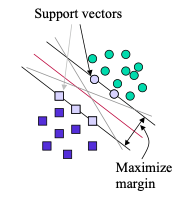

In [47]:
lr.decision_function(iris.iloc[3:10,:-1])  

array([[  6.91162937,   3.19409284, -10.10572221],
       [  7.47964369,   3.26894149, -10.74858518],
       [  6.62916458,   3.13725184,  -9.76641642],
       [  7.34522251,   3.02490021, -10.37012272],
       [  7.03427455,   3.31187765, -10.3461522 ],
       [  7.05409147,   3.17087053, -10.224962  ],
       [  6.89459703,   3.44799105, -10.34258808]])

### decision_path
 해당 값이 decision tree에서 어떤 노드를 지나쳐 갔는지 보여줌.

In [48]:
dt.decision_path(([[3,3,3,3]]),check_input=True)

<1x17 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [49]:
dt.decision_path(([[3,3,3,3]]),check_input=True).todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]])

In [50]:
dt.decision_path(([[3,3,3,3]])).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]])

In [50]:
dt.decision_path(([[3,3,3,3]])).toarray()

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]])

## Ensemble
- 음악에서 ensemble은 여러 목소리가 합쳐진것을 의미
-  모델이 여러개를 이용하여  안정적인 예측을 하는 모델을 만들기 위해 사용
    - 예. random forest: 숲은  나무로 구성되어있음-> 여러개의 decision tree 로 구성

### Boosting
- 잘 분리한 데이터와 아닌 데이터를 분리하고 분류하기 힘든 데이터들에게 **가중치** 더 주어 집중 학습함
    - imbalanced data 에 계속 적합시켜서 성능이 좋아질 수 밖에 없음.
- 여러개의 약한 분류기들를(weak learners) **순차적으로(sequentially)** 합쳐서 강한 분류기 한 개를 생성    
     - 편향을 줄이나 과대 적합 문제 발생하게됨,
     -  Xgboosting - 가장 성능 좋음 (변형판)

- ` AdaBoostClassifier( base_estimator=None,n_estimators=50)`
    - base estimator는 decision treee (non parametric model 에 ensemble 함.. parameter 찾을 필요가 없음 )
- 딥러닝도 사용가능 
    - 여러개 만들어야 하기 때문에 학습시키는데 resource 가 많이 필요함
     - 하드웨어가 발달하면서 일반적으로 됨.


In [5]:
from sklearn.ensemble import AdaBoostClassifier
# Adaboosting 이 gradient boosting 보다 발전됨

In [77]:
ada=AdaBoostClassifier(n_estimators=10 ) 
ada.fit( iris.iloc[:, :-1], iris.iloc[:, -1])
ada.score( iris.iloc[:, :-1], iris.iloc[:, -1])

0.96

In [73]:
#!pip install xgboost # XgBoosting 따로 다운로드 해야함

### BaggingClassifier
- Bootstrap AGGregation 의 약자
- 붓츠트랩(Bootstrap) 표본 추출
    - 어떤 데이터에서 일부를 뽑고 다시 넣기를 반복하여 (**랜덤 복원 추출 샘플링**)
        > cross validaiton 은 k개로 데이터를 분할 사용(비복원 추출)
- 동일한 알고리즘을 바탕으로 각 예측값을 총계(Aggregating)내는 방식으로 구현
    - 범주형 : voting
    - 연속형 : 평균 

- 특히 decision tree와 같은 black-box 모델에 랜덤성을 추가하여 **분산을 줄이기 위해** 많이 사용됨.



In [2]:
from sklearn.ensemble import BaggingClassifier

- `BaggingClassifier( base_estimator=None,n_estimators=10)`
    - 기본 decision tree 10개 각각 학습시켜서 voting함

In [30]:
bag=BaggingClassifier() #base estimator = decision tree
bag.fit(iris.iloc[:,:-1],iris.species)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [31]:
bag.score(iris.iloc[:,:-1],iris.species)

0.9933333333333333

#### bagging vs boosting
- 공통점: 여러개의 모델을 사용하여 단일 모델보다 안정적(분산 감소)
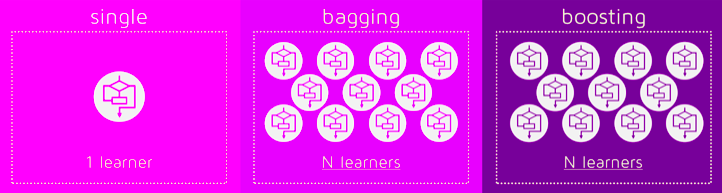

차이점
   1. 샘플링: 둘다 복원추출( 랜덤하게 데이터의 일부를 사용하고 사용한 데이터를 제외 시키지 않고 포함하여 다시 데이터 사용_
        - bagging: 단순 복원 추출
        - boosting: 복원 추출 후 오분류된 데이터에 가중치를 줌 
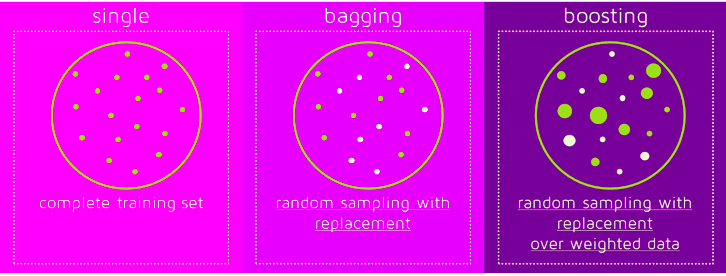


 2. 처리 순서
       - bagging: 병렬( 각 모델이 독립적으로 만들어져 훈련됨)
       - boosting: 순차적( 학습 할때마다 오분류된 데이터의 가중치 크게 업데이트 )
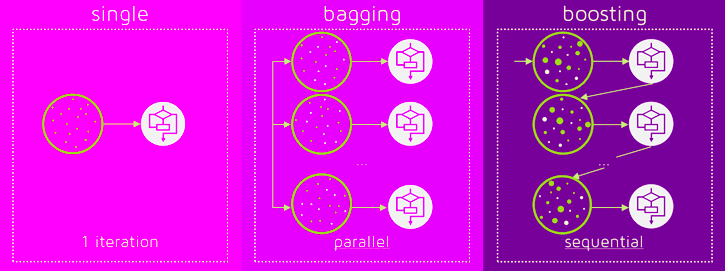




3. 예측
    - bagging:일반적인 산술평균( 데이터 갯수로 나눔; 가중치가 동일하다고 보면 됨)
    - boosting: 가중 평균 ( 가중치에 따라 나누는 크기가 상이)
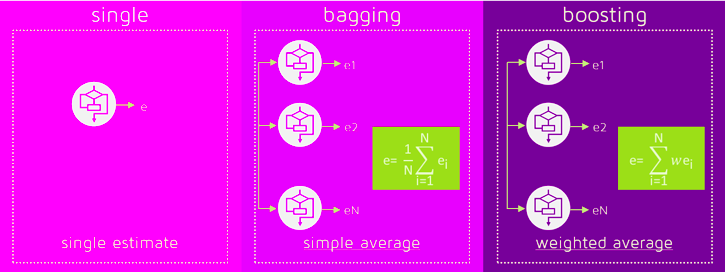

    - bagging : 모든 모델을 다 유지함 
         - overfitting 문제 해결(variance(분산) 줄임)
    - boosting: 학습 후 에러율에 따라서 가중치 업데이트 할지 순차적으로 결정
        -  bias(편향) 줄임
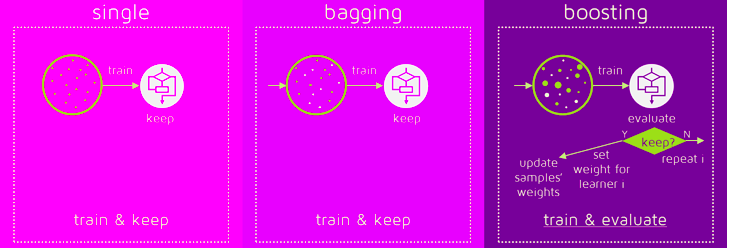

출처:https://www.kdnuggets.com/2017/11/difference-bagging-boosting.html

### RandomForestClassifier
- 이름에서도 알수 있다 시피 decisoin tree 와 관련됨
- `RandomForestClassifier(n_estimators=100,bootstrap=True)`
    - bootstrap=True 인경우 DecisionTree를 base로 사용하는 bagging(기본 100개의 decision tree를 평균냄
    - 예측 정확도를 높이고 과적합 가능성 낮추어 인기 많았던 모델
- embeded 방식의 feature selection도 가능
    - `feature_importances_`

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=10)

In [40]:
rf.fit(iris.iloc[:,:-1],iris.species)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rf.score(iris.iloc[:,:-1],iris.species) #위와 동일한 조건을 주었더니 비슷하게 나옴

0.9933333333333333

embeded 방식의 feature selection 가능

In [104]:
rf.feature_importances_ #3,4번째 값이 중요함

array([0.07575183, 0.01886554, 0.53044446, 0.37493817])

### VotingClassifier
- bagging , Random Forest와 다르게 여러 base estimator 사용
- n 개의 모델 중에서 투표(voting)을 통해서 하나를 선택
- 확률 표현 가능.
    - decision function을 찾는 알고리즘마다 고유의 특성을 갖는것을 알수 잇음
- Bias문제 :  항상 맞지 않음.
    - 과대적합된 모델이 많으면 과대적합된 모델을 선택하게 됨,

`VotingClassifier(**estimators**)`
- estimators 복수형태
- numpy의 structurd array 사용(`pipeline`에서도 사용함 )  . 
    - list of `(str, estimator)`

In [157]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [185]:

vc1=VotingClassifier([(
    'knn',KNeighborsClassifier()),('nb',GaussianNB()),
                                   ('lr',LogisticRegression())])
vc2=VotingClassifier([(
    'knn',KNeighborsClassifier()),('nb',GaussianNB()),
                                   ('lr',LogisticRegression())],
    flatten_transform=False,voting='soft')

In [186]:
vc1.fit(iris.iloc[:,:-1],iris.species)
vc2.fit(iris.iloc[:,:-1],iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
         

-  hard
    - 알고리즘들이 예측한 class에 대한 다수결 투표
        -  서로 다른 예측했을 때, 두 예측의 정확도기반으로 결정 

- soft
    - 알고리즘들이 예측한 class에 대한 가중치 투표
    - 예측한 확률의 합을 최대화 하는것 중 가장 큰것 


정확도는 두개의 모델중에서 다수결한 것이 제일 큼.
- 그 모델이 overfiting 된 가능성 높음

In [187]:
vc1.voting  # hard voting ->  단순한 다수결

'hard'

In [47]:
vc1.score(iris.iloc[:,:-1],iris.species) #3개 모델 hard voting

0.9666666666666667

In [48]:
vc2.score(iris.iloc[:,:-1],iris.species) #3개 모델 soft voting

0.96

각 클래스에 예측된 knn, logistic regression 

In [79]:
vc1.transform([[3,3,3,3]]) # 각자 다른것 선택.

array([[1, 2, 0]])

In [78]:
vc1.predict([[3,3,3,3]]) #hard :  class 0 선택

array([0])

In [81]:
vc2.transform([[3,3,3,3]]) #3 모델 별 , 3  클래스 별

array([[[0.00000000e+000, 8.00000000e-001, 2.00000000e-001]],

       [[3.37501362e-161, 1.36987582e-010, 1.00000000e+000]],

       [[5.69067320e-001, 1.64028205e-001, 2.66904475e-001]]])

In [80]:
vc2.predict([[3,3,3,3]]) # 2번째 클래스의 확률의 총합이 제일 큼

array([2])

In [93]:
np.sum( vc2.transform([[3,3,3,3]]),axis=0) #2번째 클래스의 확률의 총합이 제일 큼

array([[0.56906732, 0.96402821, 1.46690447]])

### GridSearchCV&Pipeline
ensemble 을 gridserach CV 사용
- 어떤 estimator 가 좋을지
- 어떤 하이퍼 파라미터일떄 성능이 좋은지
- 유연하게 사용하기 위해서 GridSearchCV ,Pipeline 같이 사용

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

- gridsearch CV의 voting 방법을 바꿀수가 있음
 - 모델들 중에서 voting 하면 어떤 모델이 가장 좋은 성능이 나오는지.
 
 #### 다른 모델 비교

In [160]:
#서로 상이한 알고리즘
vc= VotingClassifier(
[
    ('knn',KNeighborsClassifier()),
     ('lr', LogisticRegression())
]
    )

In [161]:
pipe=Pipeline([('vc',vc)])

In [162]:
vc.fit(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                              

In [102]:
vc.transform([[3,3,1,3]]) # 2개 다 모두 0 으로 분류

array([[0, 0]])

In [103]:
vc.get_params()  #KNeighborsClassifier,LogisticRegression 

{'estimators': [('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform')),
  ('lr',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'flatten_transform': True,
 'n_jobs': None,
 'voting': 'hard',
 'weights': None,
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_i

#### 하이퍼 파라미터 비교

In [173]:
#동일한 알고리즘 하이퍼 파라미터 비교 가능.
vc= VotingClassifier(
    [
    ('knn1',KNeighborsClassifier(n_neighbors=5)),
     ('clf', KNeighborsClassifier(n_neighbors=8)),
        ('clf1', KNeighborsClassifier(n_neighbors=15))
     ])

In [174]:
pipe=Pipeline([('vc',vc)])

In [175]:
pipe.get_params()

{'memory': None,
 'steps': [('vc', VotingClassifier(estimators=[('knn1',
                                 KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None, n_neighbors=5,
                                                      p=2, weights='uniform')),
                                ('clf',
                                 KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None, n_neighbors=8,
                                                      p=2, weights=

In [176]:
vc.fit(iris.iloc[:,:-1], iris.species)

VotingClassifier(estimators=[('knn1',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('clf',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=8,
                                                   p=2, weights='uniform')),
                             ('clf1',
                       

In [177]:
vc.transform([[3,3,1,3]]) #3개다 모두 0 으로 분류

array([[0, 0, 0]])

각 estimator 의 결과는 class 0 (setosa) 로 예측

#### pipeline + GridSearchCV

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
#위의 파이프라인 가져다 씀
grid=GridSearchCV(pipe,{'vc__clf':[KNeighborsClassifier(10),LogisticRegression()] })

In [181]:
grid.fit(iris.iloc[:,:-1],iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vc',
                                        VotingClassifier(estimators=[('knn1',
                                                                      KNeighborsClassifier(algorithm='auto',
                                                                                           leaf_size=30,
                                                                                           metric='minkowski',
                                                                                           metric_params=None,
                                                                                           n_jobs=None,
                                                                                           n_neighbors=5,
                                                                                           p=2,
                                                  

In [182]:
pd.DataFrame(grid.cv_results_).T #큰차이 없음, 하이퍼 파라미터 비교 

,0,1
mean_fit_time,0.00765705,0.0351833
std_fit_time,0.00166509,0.00246914
mean_score_time,0.0120192,0.00700932
std_score_time,0.00263071,0.00130543
param_vc__clf,"KNeighborsClassifier(algorithm='auto', leaf_si...","LogisticRegression(C=1.0, class_weight=None, d..."
params,{'vc__clf': KNeighborsClassifier(algorithm='au...,"{'vc__clf': LogisticRegression(C=1.0, class_we..."
split0_test_score,0.966667,0.966667
split1_test_score,1,1
split2_test_score,0.933333,0.933333
split3_test_score,0.966667,0.966667


--- 
### StackingClassifier   
- kaggle 에서 ensemble 알고리즘 중에서 가장 성능 좋아서 많이 사용됨.
-  여러개 모델들의 학습을 통해 예측 결과를 바탕으로 데이터 재학습하여 최종 예측값을 줌
- 각 estimator의 장점들을 이용하여 이것들의 결과를  최종의 입력으로 이용


In [139]:
from sklearn.ensemble import StackingClassifier

In [142]:
sc=StackingClassifier([('clf',LogisticRegression()),   #  옵션 바꿈
                       ('knn',KNeighborsClassifier()), #변경 안됨 -옵션 그대로
                      ])
# r기본 알고리즘 논문 바탕.

gride serach CV 사용해서 가능
파이프 라인이 붙어야지만 이름이 estimator 로 연결해서 이름을 변경

In [143]:
pipe=Pipeline([('sc',sc)])

여러가지 조합을 이용 결과값 확인 

In [144]:
pipe.get_params()

{'memory': None,
 'steps': [('sc', StackingClassifier(cv=None,
                      estimators=[('clf',
                                   LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None, max_iter=100,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=None,
                                                      solver='lbfgs', tol=0.0001,
                                                      verbose=0,
                                                      warm_start=False)),
                                  ('knn',
                          

In [145]:
pipe.fit(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Pipeline(memory=None,
         steps=[('sc',
                 StackingClassifier(cv=None,
                                    estimators=[('clf',
                                                 LogisticRegression(C=1.0,
                                                                    class_weight=None,
                                                                    dual=False,
                                                                    fit_intercept=True,
                                                                    intercept_scaling=1,
                                                                    l1_ratio=None,
                                                                    max_iter=100,
                                                                    multi_class='auto',
                                                                    n_jobs=None,
                                                                    penalty='l2',
                   

In [152]:
grid=GridSearchCV(pipe, {'sc__clf':[LogisticRegression(),KNeighborsClassifier(15)]})
grid.fit(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StackingClassifier(cv=None,
                                                           estimators=[('clf',
                                                                        LogisticRegression(C=1.0,
                                                                                           class_weight=None,
                                                                                           dual=False,
                                                                                           fit_intercept=True,
                                                                                           intercept_scaling=1,
                                                                                           l1_ratio=None,
                                                                                   

LogisticRegression vs KNeighborsClassifier

In [153]:
pd.DataFrame(grid.cv_results_).T #서로 다른 알고리즘 비교

,0,1
mean_fit_time,0.290348,0.0480039
std_fit_time,0.0368998,0.00343726
mean_score_time,0.00368228,0.00369339
std_score_time,0.0010553,0.00082808
param_sc__clf,"LogisticRegression(C=1.0, class_weight=None, d...","KNeighborsClassifier(algorithm='auto', leaf_si..."
params,"{'sc__clf': LogisticRegression(C=1.0, class_we...",{'sc__clf': KNeighborsClassifier(algorithm='au...
split0_test_score,0.966667,0.966667
split1_test_score,1,1
split2_test_score,0.933333,0.933333
split3_test_score,0.966667,0.966667


In [150]:
grid.best_score_ #둘다 동일하게 잘함.

0.9733333333333334

### RandomizedSearchCV
- 랜덤하게 분포에서 확률이 높은 것을 따름( `scipy.stat.distribution`에서 가져옴)
- 반복해서 가장 많이 나오는경우 (일어날 가능성이 높은 경우) 부터 찾아서 성능 좋을 가능성이 있음
  - grid search cv 모든 경우의수를 확인하여 최고의 성능을 내는 것을 찾으나 딥러닝이나 데이터가 클 때  모든 경우 찾는게 많은 resource필요 하기 때문에 많이 일어나는 경우 부터 효율적으로 찾아나감.
    - 정확도 :grid > RandomizedSearchCV
     - 데이터 많은 경우 효율성: grid < RandomizedSearchCV

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import norm

In [123]:
norm # rvs random 

딥러닝에서도 나옴.
- randomized serach CV by Yoshua Bengio 

중요한 파라미터 인 5 를 고름
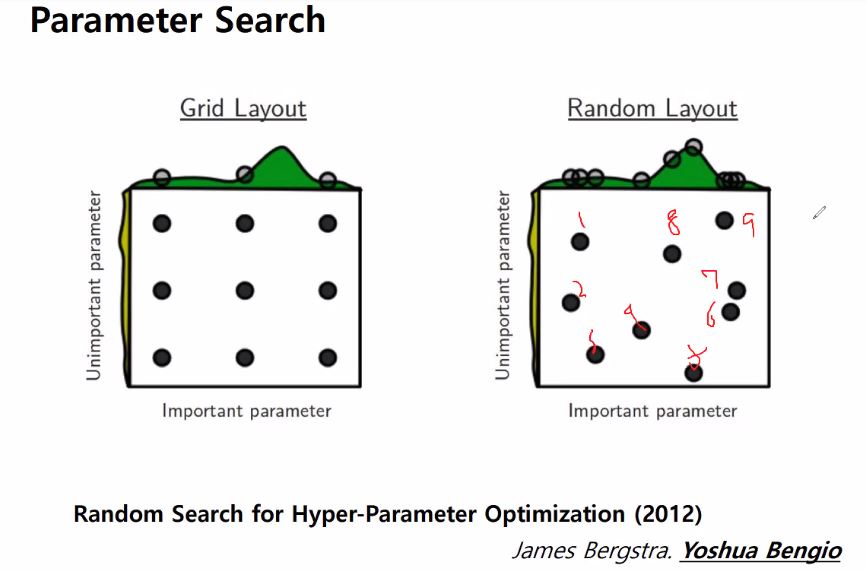


In [124]:
norm.rvs() #정규 분포를 따르는 랜던값 생성

0.6181592915240186

In [126]:
ra=RandomizedSearchCV(LogisticRegression(), {'C':[1,2,3]},cv=10)

In [127]:
ra.fit(iris.iloc[:,:-1], iris.species);

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [288]:
pd.DataFrame(ra.cv_results_).T # 각C =0,1,2별로 비교, 2번이 제일 score 높ㄹ

,0,1,2
mean_fit_time,0.0410947,0.0355047,0.0465999
std_fit_time,0.00353969,0.00452684,0.0107602
mean_score_time,0.00331159,0.00279334,0.00339906
std_score_time,0.0010897,0.00153026,0.00135033
param_C,1,2,3
params,{'C': 1},{'C': 2},{'C': 3}
split0_test_score,1,1,1
split1_test_score,0.933333,0.933333,0.933333
split2_test_score,1,1,1
split3_test_score,1,1,1


In [183]:
ra.best_estimator_

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
ra.best_score_

0.9800000000000001